Grupo:
- Beatriz de Araújo Andrade (baa)
- Thiago de Souza Farias (tsf)

## Descrição do Projeto

Este projeto tem como objetivo analisar a relação entre diversas informações sobre filmes, visando entender melhor os padrões e tendências dentro da indústria cinematográfica. O conjunto de dados examinado contém informações detalhadas sobre os filmes, como popularidade, gênero, orçamento, receita, votos, data de lançamento e duração.

Para enriquecer nossa análise, utilizamos a API do JustWatch para coletar os nomes das plataformas de streaming que disponibilizam cada filme, integrando essa informação ao dataset para uma análise posterior.

O projeto está dividido em etapas distintas:

1. **Coleta de Dados:** Inicialmente, coletamos os nomes das plataformas de streaming que disponibilizam cada filme, utilizando a API do JustWatch. (outro notebook), integrando-os ao dataset do TMDB.

2. **Pré-processamento dos Dados:** Nesta etapa, realizamos diversas tarefas de preparação dos dados, como definição dos tipos de dados, tratamento de dados ausentes, normalização e discretização, e limpeza de dados univariada, bivariada e multivariada.

3. **Análise Descritiva:** Apresentamos estatísticas descritivas dos dados por meio de visualizações, proporcionando insights sobre as características e distribuições das variáveis analisadas.

4. **Teste de Hipóteses:** Realizamos testes de hipóteses para comparar valores de categorias e visualizar diferenças significativas entre os grupos analisados, ajudando a confirmar ou refutar suposições sobre as relações entre as variáveis.

Este projeto visa fornecer uma compreensão mais profunda das dinâmicas presentes na indústria cinematográfica, explorando como diferentes variáveis estão inter-relacionadas e contribuem para o sucesso e recepção dos filmes.

## Preparação do Ambiente e Carregamento dos dados

In [240]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv('movies_with_streamings.csv')

## Contextualização dos dados

In [242]:
df.shape

(10866, 22)

In [243]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [244]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'streaming_services'],
      dtype='object')

Ao realizar uma análise preliminar do nosso conjunto de dados, observamos que ele contém 10.866 amostras, com informações divididas em 6 variáveis nominais, 7 variáveis categóricas, 8 variáveis numéricas e 1 variável temporal.

- **Variável nominal:**
  - **original_title**: Título original do filme.
  - **id**: Identificador único do filme.
  - **imdb_id**: Identificador IMDb do filme.
  - **tagline**: Frase de efeito associada ao filme.
  - **overview**: Resumo do filme.
  - **homepage**: Endereço do website do filme.


- **Variáveis categóricas:**
  - **cast**: Lista de atores principais do filme.
  - **director**: Nome do diretor do filme.
  - **keywords**: Palavras-chave associadas ao filme.
  - **genres**: Gêneros aos quais o filme pertence.
  - **production_companies**: Lista das produtoras que participaram do filme.
  - **streaming_services**: Nomes das plataformas de streaming que disponibilizam o filme.
  - **release_year**: Ano de lançamento do filme.

- **Variáveis numéricas:**
  - **popularity**: Medida de popularidade do filme.
  - **budget**: Orçamento do filme em dólares.
  - **revenue**: Receita gerada pelo filme em dólares.
  - **runtime**: Duração do filme em minutos.
  - **vote_count**: Número de votos recebidos.
  - **vote_average**: Média das avaliações recebidas (valor de 0 a 10, baseado na plataforma IMDb).
  - **budget_adj**: Orçamento ajustado pela inflação.
  - **revenue_adj**: Receita ajustada pela inflação.

- **Variável temporal**
    - **release_date**:Data de lançamento do filme.


## Pré-processamento dos Dados

### Remoção de colunas irrelevantes

Ao avaliar as variáveis do dataset, observamos que algumas são desnecessárias para a análise. Portanto, removeremos do DataFrame as seguintes colunas:

- **id**, **imdb_id**, **tagline**, **overview**, **homepage**, **original_title**, **keywords**, **cast**, **director**, **production_company**, **release_date**, **runtime**: Estas colunas são consideradas desnecessárias para a análise.

Essa simplificação ajudará a focar na análise das variáveis mais relevantes e a evitar redundâncias no dataset.

In [245]:
col_to_drop = ['id', 'imdb_id', 'tagline', 'overview', 'homepage', 'original_title', 'keywords', 'cast', 'director', 'production_companies', 'release_date', 'runtime']
df.drop(columns=col_to_drop, inplace=True)
df.head()

,popularity,budget,revenue,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,190000000,1506249360,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [246]:
df.columns

Index(['popularity', 'budget', 'revenue', 'genres', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'streaming_services'],
      dtype='object')

#### Remoção de colunas com muitos dados zerados

In [247]:
colunas_numericas = ['popularity', 'budget', 'revenue', 'vote_average', 'vote_count', 'budget_adj', 'revenue_adj']

df[colunas_numericas][df[colunas_numericas] == 0].count()

popularity         0
budget          5696
revenue         6016
vote_average       0
vote_count         0
budget_adj      5696
revenue_adj     6016
dtype: int64

É importante avaliar as colunas numéricas do dataset para identificar e remover aquelas que apresentam uma quantidade significativa de valores zero, não sendo possível fazer uma inputação relevante.
 E como mais da metade dos valores para **budget**, **revenue**, **budget_adj** e **revenue_adj** são iguais a zero, então removeremos essas colunas.

In [248]:
col_to_drop = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
df.drop(columns=col_to_drop, inplace=True)
df.head()

,popularity,genres,vote_count,vote_average,release_year,streaming_services
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,2015,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,Action|Crime|Thriller,2947,7.3,2015,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


### Tratamento de dados replicados

Antes de definirmos os tipos de dados, é necessário tratá-los, especialmente considerando a possibilidade de duplicações. Isso se deve ao fato de que uma das variáveis será convertida em uma lista, e esse tipo de dado é considerado "unhashable", o que pode interferir no funcionamento adequado da função "duplicated", que é utilizada para identificar duplicatas nos dados.

**Verificando a existência de dados duplicados e removendo-os**

In [249]:
df.duplicated().sum()

1

In [250]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 6)

### Definição dos tipos dos dados

In [251]:
df.dtypes

popularity            float64
genres                 object
vote_count              int64
vote_average          float64
release_year            int64
streaming_services     object
dtype: object

Ao examinarmos os tipos das nossas variáveis, notamos que as variáveis categóricas "genres", "streaming_services" e "release_year" não foram definidas adequadamente.

Dessa forma, vamos implementar as seguintes modificações:

- A variável "release_year" será convertida para o tipo categoria.
- As variáveis "genres" e "streaming_services" terão seus valores transformados em listas para serem tratadas posteriormente.

Para a variável "genres", as categorias estão agrupadas em uma única string, com os gêneros separados por "|". Portanto, iremos dividir a string usando o delimitador mencionado e converter os valores em uma lista.

No caso da variável "streaming_services", as categorias já estão em formato de lista, mas foram importadas como tipo "object", o que, a priori, significa que são tratadas como strings. Além disso, iremos remover das listas os nomes das plataformas de streaming que não serão analisadas. As plataformas que serão analisadas são: Netflix, Max, Amazon Prime, Disney Plus e Hulu, as mais populares no Brasil.

**Definindo o tipo de release_date como "category"**

In [252]:
df['release_year'] = df['release_year'].astype("category")
df['release_year'] = df['release_year'].cat.codes
df.head()

,popularity,genres,vote_count,vote_average,release_year,streaming_services
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,55,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,55,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,55,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,55,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,Action|Crime|Thriller,2947,7.3,55,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [253]:
len(df['release_year'].unique())

56

Observa-se que a variável "release_year" apresenta 56 categorias distintas. Isso representa um desafio futuro, pois a aplicação de one-hot encoding para todas as categorias seria inviável, resultando em um acréscimo de 56 colunas no conjunto de dados. Esse aumento significativo de dimensões dificulta o treinamento do modelo e pode comprometer sua performance.

**Transformando os valores de "genres" em listas**

In [254]:
df['genres'] = df['genres'].str.split('|')
df.head()

,popularity,genres,vote_count,vote_average,release_year,streaming_services
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,55,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,55,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,"[Adventure, Science Fiction, Thriller]",2480,6.3,55,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,55,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,"[Action, Crime, Thriller]",2947,7.3,55,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [255]:
#"Explode" as listas de gêneros para criar uma nova linha para cada elemento da lista
exploded_genres = df.explode('genres')

#Obtem todos os valores únicos da coluna 'genres'
all_genres = exploded_genres['genres'].unique()
print(f"Número de gêneros analisados: {len(all_genres)}")
all_genres

Número de gêneros analisados: 21


array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

Aplicar One Hot Encoding na coluna de gênero iria gerar 20 colunas novas, já que uma das colunas identificadas foi "nan". Portanto, como a grande maioria dos modelos não consegue lidar com listas e dados nominais, iremos usar essa técnica mais adiante para que isso não seja um problema.

**Conversão de streaming_services de string para lista**

In [256]:
df['streaming_services'] = df['streaming_services'].apply(ast.literal_eval)

**Filtrando as listas de streaming services para manter apenas os valores de interesse**

In [257]:
#Apresenta todas as plataformas de streaming abarcadas no dataset
set(y for x in df['streaming_services'] for y in x)

{'ALLBLK Apple TV channel',
 'AMC',
 'AMC Plus Apple TV Channel ',
 'AMC on Demand',
 'AMC+',
 'AMC+ Amazon Channel',
 'AMC+ Roku Premium Channel',
 'ARROW',
 'Acorn TV',
 'Acorn TV Apple TV',
 'AcornTV Amazon Channel',
 'Amazon Prime Video',
 'Amazon Prime Video with Ads',
 'Amazon Video',
 'Apple TV',
 'Apple TV Plus',
 'AsianCrush',
 'Atom Tickets',
 'B&B Theatres',
 'BBC America',
 'BET+  Apple TV channel',
 'Bet+ Amazon Channel',
 'Boomerang',
 'Boomerang Amazon Channel',
 'BritBox',
 'BritBox Amazon Channel',
 'Britbox Apple TV Channel ',
 'BroadwayHD',
 'Chai Flicks',
 'Cinemark',
 'Cinemax Amazon Channel',
 'Cinemax Apple TV Channel',
 'Cinepolis USA',
 'Cineverse',
 'Classix',
 'Cohen Media Amazon Channel',
 'Crackle',
 'Criterion Channel',
 'Crunchyroll',
 'Crunchyroll Amazon Channel',
 'Cultpix',
 'Curiosity Stream',
 'CuriosityStream Apple TV Channel',
 'DOCSVILLE',
 'Dekkoo',
 'Disney Plus',
 'DisneyNOW',
 'DistroTV',
 'DocAlliance Films',
 'Dogwoof On Demand',
 'Eros Now'

In [258]:
#Plataformas de streaming a serem analisadas
main_streaming_platforms = {'Netflix', 'Max', 'Amazon Prime Video', 'Disney Plus', 'Hulu'}

#Filtra as listas das plataformas de streaming, mantendo apenas os itens principais
df['streaming_services'] = df['streaming_services'].apply(lambda x: [service for service in x if service in main_streaming_platforms])

df.head()

,popularity,genres,vote_count,vote_average,release_year,streaming_services
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,55,[Max]
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,55,[Max]
2,13.112507,"[Adventure, Science Fiction, Thriller]",2480,6.3,55,[Hulu]
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,55,[Disney Plus]
4,9.335014,"[Action, Crime, Thriller]",2947,7.3,55,[Max]


Como estamos analisando apenas as plataformas de streaming mais famosas no Brasil, essa variável apresenta apenas 5 categorias. Porém, como os filmes podem ser disponibilizados por mais de um serviço os valores são listas. Por isso, também aplicaremos o One Hot Encoding a esta coluna.

In [259]:
df.dtypes

popularity            float64
genres                 object
vote_count              int64
vote_average          float64
release_year             int8
streaming_services     object
dtype: object

Após esta etapa, as colunas "genres" e "streaming_services" ainda não possuem tipos adequados. No entanto, isso será corrigido posteriormente, durante o processo de codificação.

### Tratamento de Dados Ausentes e Codificação das Variáveis Categóricas

Antes de prosseguirmos com a codificação das variáveis categóricas, é necessário verificar se alguma delas, ou outras colunas, contêm dados ausentes, uma vez que não é possível codificar valores "nan".

**Verificando a existência de dados ausentes**

In [260]:
df.isna().sum()

popularity             0
genres                23
vote_count             0
vote_average           0
release_year           0
streaming_services     0
dtype: int64

É notável que apenas a coluna "genres" apresentou dados ausentes, 23 instâncias. Dessa forma, iremos tratá-los a partir da técnica de imputação por classificação.

In [261]:
df['genres'].head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

Para treinar um modelo de classificação com múltiplas saídas, dado que um filme pode ser associado a mais de um gênero, é necessário codificar os dados categóricos que não possuem valores ausentes. Para isso, utilizaremos o método de One Hot Encoding.

**Agrupamento e Codificação de "release_year"**

Para reduzir a quantidade de categorias na variável "release_year", agruparemos os anos de lançamento em intervalos fixos de 4 anos.

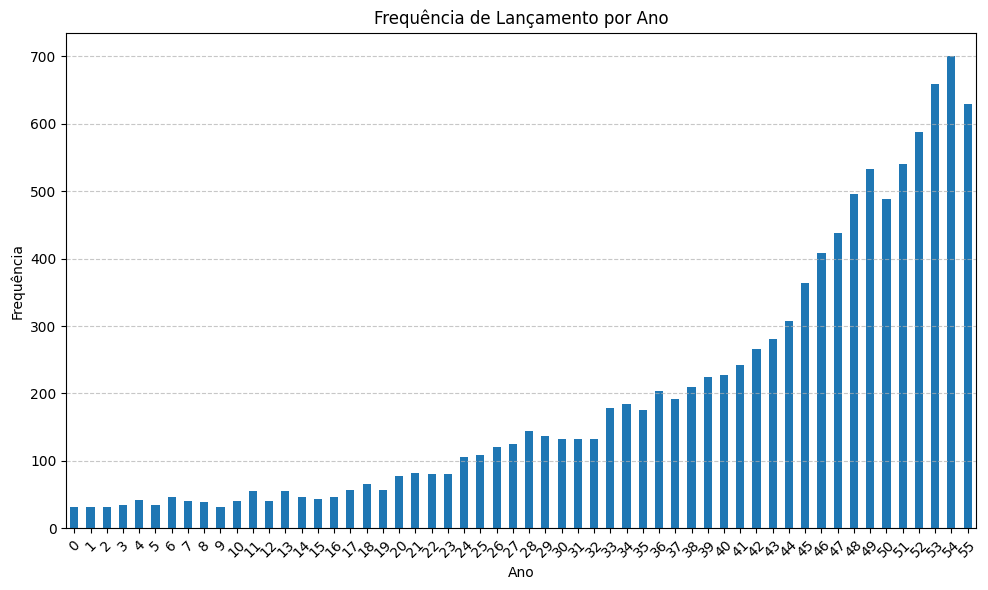

In [262]:
# Contagem de frequência dos anos de lançamento
year_counts = df['release_year'].value_counts().sort_index()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Frequência de Lançamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos agrupar os dados em intervalos de 4 anos, pois, ao analisar o gráfico, observamos que a maioria dos grupos não apresenta uma variação muito grande no número de filmes lançados.

In [263]:
# Obtendo os valores únicos de release_year
unique_years = df['release_year'].unique()

# Criando faixas de 4 anos
bins = np.arange(min(unique_years), max(unique_years) + 5, 4)

# Discretizando os valores de release_year e obtendo os índices dos intervalos
df['release_year_discretized'] = pd.cut(df['release_year'], bins=bins, labels=False, right=False)


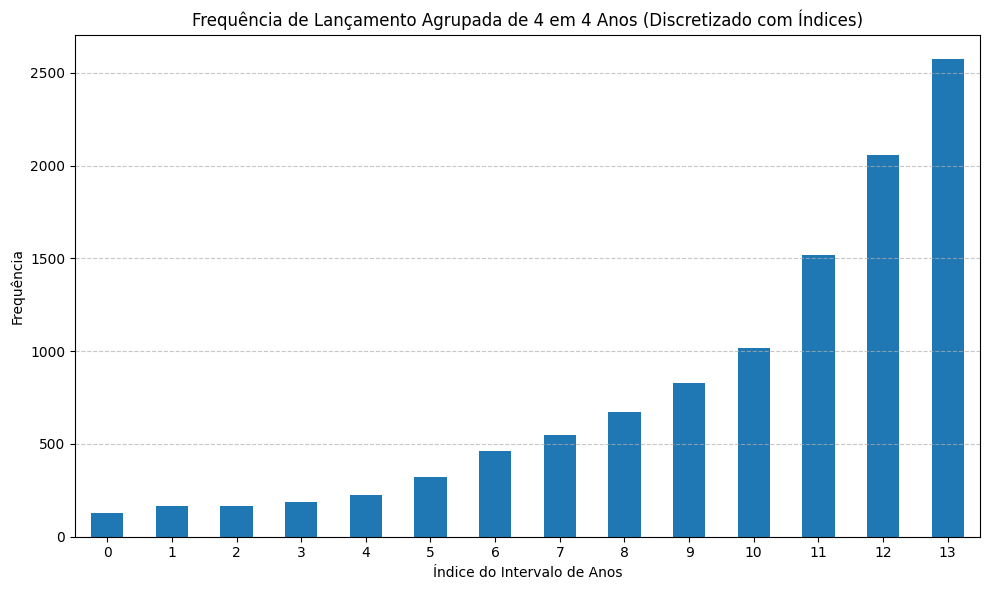

In [264]:
# Contagem de frequência dos intervalos
year_counts_grouped = df['release_year_discretized'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
year_counts_grouped.plot(kind='bar')
plt.title('Frequência de Lançamento Agrupada de 4 em 4 Anos (Discretizado com Índices)')
plt.xlabel('Índice do Intervalo de Anos')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [265]:
# Aplicando o one-hot encoding
df_one_hot = pd.get_dummies(df['release_year_discretized'], prefix='release_year').astype('int')

# Concatenando o DataFrame original com o DataFrame one-hot encoded
df = pd.concat([df, df_one_hot], axis=1)
df.drop(columns=['release_year', 'release_year_discretized'], inplace=True)
df.head()

,popularity,genres,vote_count,vote_average,streaming_services,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,release_year_6,release_year_7,release_year_8,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,[Max],0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,[Max],0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,13.112507,"[Adventure, Science Fiction, Thriller]",2480,6.3,[Hulu],0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,[Disney Plus],0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.335014,"[Action, Crime, Thriller]",2947,7.3,[Max],0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Codificação Binária de "Streaming Services"**

In [266]:
# Codifica os possíveis valores de streaming services para binário
mlb_services = MultiLabelBinarizer()
services_encoded = mlb_services.fit_transform(df['streaming_services'])

# Separa os dados de streaming services codificados
services_df = pd.DataFrame(services_encoded, columns=mlb_services.classes_)
services_df

,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
10860,1,0,0,0,0
10861,0,0,0,0,0
10862,0,0,0,0,0
10863,0,0,0,0,0


In [267]:
# Adiciona as colunas das categorias de serviço de streaming ao DataFrame original
df = pd.concat([df.reset_index(drop=True), services_df.reset_index(drop=True)], axis=1)

# Remove a coluna 'streaming_services', pois ela não será mais necessária após a codificação
df.drop(columns=['streaming_services'], inplace=True)
df.head()

,popularity,genres,vote_count,vote_average,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,...,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,13.112507,"[Adventure, Science Fiction, Thriller]",2480,6.3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,9.335014,"[Action, Crime, Thriller]",2947,7.3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [268]:
df.columns

Index(['popularity', 'genres', 'vote_count', 'vote_average', 'release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13', 'Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix'],
      dtype='object')

**Tratamento dos dados ausentes em "genres"**

Primeiro, separamos os dados ausentes do restante do DataFrame. Em seguida, codificamos os valores dos gêneros de filmes para que possam ser utilizados pelo modelo, que será treinado para preencher esses valores ausentes.

In [269]:
#Dataframe com valores ausentes para a coluna "genres"
df_na = df[df['genres'].isna()]
#Dataframe sem valores ausentes para a coluna "genres"
df_not_na = df[~df['genres'].isna()]

In [270]:
#Codifica os possíveis valores de gêneros para binário
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df_not_na['genres'])
genres_encoded

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Lidando apenas com dados numéricos agora, separamos as características (features) e o alvo (target) - que são os gêneros - e empregamos um pipeline para simplificar a normalização dos dados e a construção do modelo. Optamos por utilizar um modelo de Random Forest com múltiplas saídas para esta tarefa.

In [271]:
#Separa os dados em features e target
X = df_not_na.drop(columns=['genres'])
y = pd.DataFrame(genres_encoded, columns=mlb.classes_)

In [272]:
#Features numéricas
numeric_features = X.select_dtypes(exclude=['object']).columns

#Pipeline para normalizar as variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

#Combina as transformações em uma única transformação
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  #Passa todas as outras colunas não especificadas
)


In [273]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(random_state=42)))
])

In [274]:
#Treinamento do modelo de multiclassificação
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['popularity', 'vote_count', 'vote_average', 'release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13', 'Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix'],
      dtype='object'))])),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)))])

Por fim, utilizando o modelo treinado, substituímos os valores ausentes pelas previsões geradas e realizamos a codificação da coluna "genres".

In [275]:
#Previsão dos valores ausentes
X_na = df_na.drop(columns=['genres'])
y_pred = model.predict(X_na)
y_pred

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [276]:
#Converte as previsões de volta para o formato nominal
y_pred_decoded = mlb.inverse_transform(y_pred)
df_na['genres'] = [list(genres) for genres in y_pred_decoded]
df_na.head()

<ipython-input-276-25aa18691c0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['genres'] = [list(genres) for genres in y_pred_decoded]


,popularity,genres,vote_count,vote_average,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,...,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
424,0.244648,[Drama],21,6.1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
620,0.129696,[Drama],13,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
997,0.330431,[],13,6.8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1712,0.302095,[Drama],57,7.4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1897,0.020701,"[Documentary, Family]",11,7.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


É possível observar que o modelo não conseguiu definir os gêneros de alguns filmes, nesse caso iremos removê-los do nosso dataframe.

In [277]:
df_na = df_na[df_na['genres'].apply(len) > 0]
df_na.head()

,popularity,genres,vote_count,vote_average,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,...,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
424,0.244648,[Drama],21,6.1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
620,0.129696,[Drama],13,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1712,0.302095,[Drama],57,7.4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1897,0.020701,"[Documentary, Family]",11,7.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2369,0.081892,[Drama],12,5.8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [278]:
#Codificação binária dos gêneros para o dataframe df_na
genres_encoded_na = mlb.transform(df_na['genres'])
genres_df_na = pd.DataFrame(genres_encoded_na, columns=mlb.classes_)

In [279]:
#Codificação binária dos gêneros para o dataframe df_not_na
genres_encoded_not_na = mlb.transform(df_not_na['genres'])
genres_df_not_na = pd.DataFrame(genres_encoded_not_na, columns=mlb.classes_)

In [280]:
#Concatena as previsões com o dataframe original
df_na = pd.concat([df_na.reset_index(drop=True), genres_df_na.reset_index(drop=True)], axis=1)
df_not_na = pd.concat([df_not_na.reset_index(drop=True), genres_df_not_na.reset_index(drop=True)], axis=1)

In [281]:
#Concatena os dataframes com e sem valores ausentes
df_final = pd.concat([df_not_na, df_na], axis=0).reset_index(drop=True)
df_final.drop(columns=['genres'], inplace=True)
df_final.head()

,popularity,vote_count,vote_average,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,release_year_6,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,5562,6.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,6185,7.1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,2480,6.3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,5292,7.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,2947,7.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [282]:
df = df_final

### Detecção e remoção de outliers

In [283]:
df.columns

Index(['popularity', 'vote_count', 'vote_average', 'release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13', 'Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

#### **Univariada**

Para realizar o tratamento de outliers univariado, empregaremos o método de Tukey nas variáveis numéricas **popularity** e **vote_avarage**. No entanto, é importante ressaltar que esse método pressupõe uma distribuição simétrica dos dados. Portanto, realizaremos uma análise preliminar para avaliar a simetria da distribuição antes de aplicar o método de Tukey.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'vote_average'}>]], dtype=object)

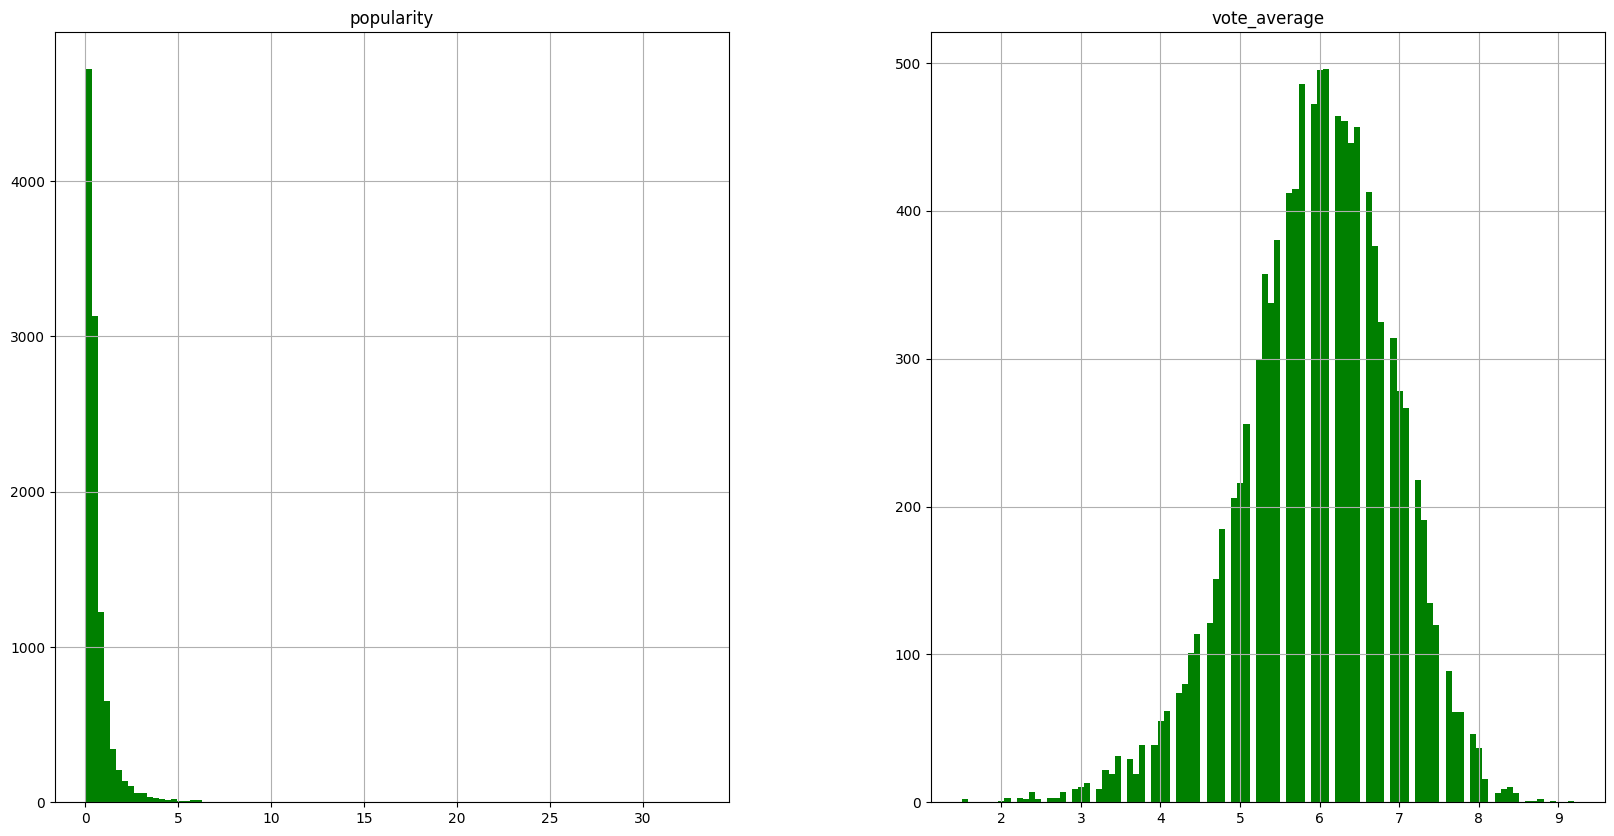

In [284]:
numerical_features = ['popularity', 'vote_average']
df[numerical_features].hist(figsize=(20, 10), color='green', bins=100)

Nota-se que os dados de **vote_average** seguem uma distribuição gaussiana. Enquanto que em **popularity** é seguida uma distribuição exponencial. Então trataremos esta coluna para também seguir uma distribuição simétrica. Para transformar esses dados em uma distribuição normal aplicaremos o log10.

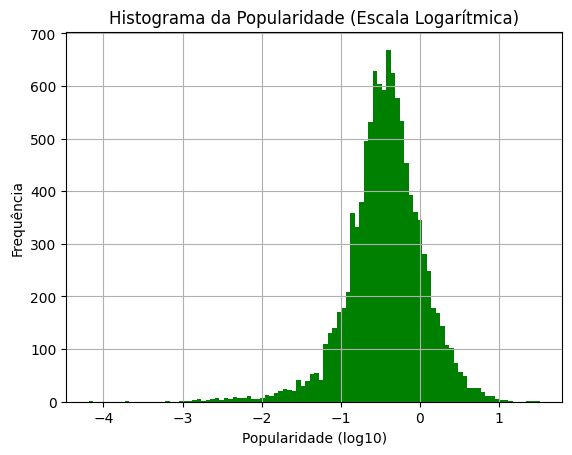

In [285]:
# Aplicando o logaritmo de base 10 apenas a valores estritamente positivos
# log_data = np.log10(df[numerical_features][df[numerical_features] > 0])
df['popularity_log'] = np.log10(df['popularity'][df['popularity'] > 0])

# Plotando histograma em escala logarítmica (base 10)
df['popularity_log'].hist(color='green', bins=100)
plt.title('Histograma da Popularidade (Escala Logarítmica)')
plt.xlabel('Popularidade (log10)')
plt.ylabel('Frequência')
plt.show()



Com os dados simétricos, podemos agora aplicar o método Tukey para encontrar os outliers.

In [286]:
numerical_cols = ['popularity_log', 'vote_average']
q1 = df[numerical_cols].quantile(0.25)
q3 = df[numerical_cols].quantile(0.75)
iqr = q3 - q1
print(iqr)

popularity_log    0.536145
vote_average      1.200000
dtype: float64


Text(0.5, 1.0, 'Boxplot das Features Numéricas (com Outliers)')

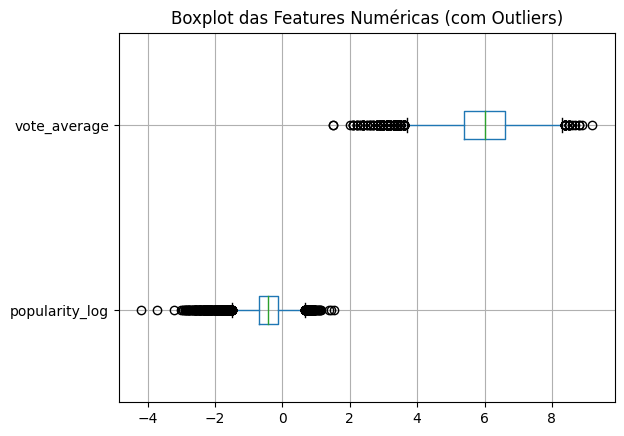

In [287]:
df[numerical_cols].boxplot(vert=False)
plt.title('Boxplot das Features Numéricas (com Outliers)')

Text(0.5, 1.0, 'Boxplot das Features Numéricas (com Outliers)')

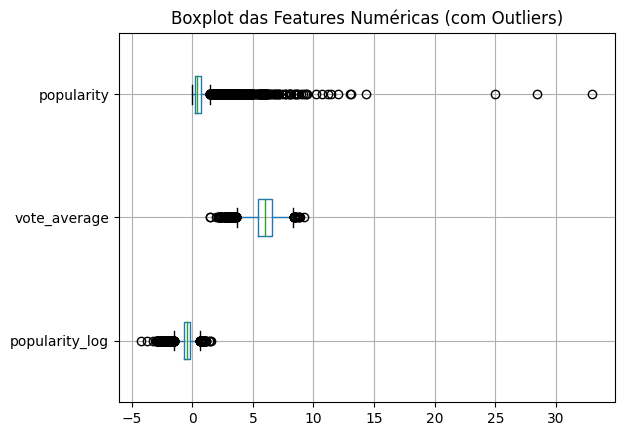

In [288]:
df[numerical_cols + ['popularity']].boxplot(vert=False)
plt.title('Boxplot das Features Numéricas (com Outliers)')

Text(0.5, 1.0, 'Boxplot das Features Numéricas (sem Outliers)')

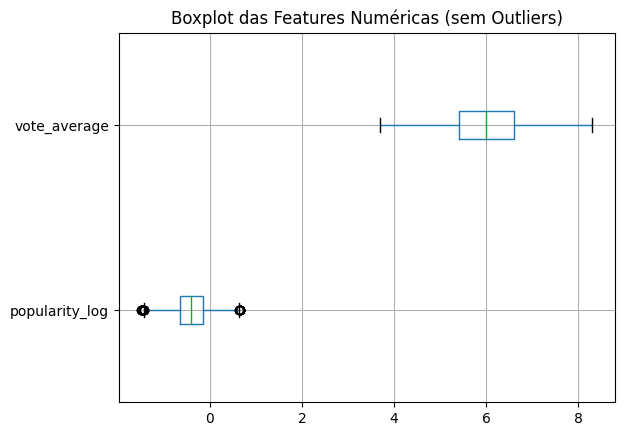

In [289]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Filtrando o dataframe para remover outliers
df_without_outliers = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

df_without_outliers[numerical_cols].boxplot(vert=False)
plt.title('Boxplot das Features Numéricas (sem Outliers)')

In [290]:
df = df_without_outliers
df.drop(columns=['popularity_log'], inplace=True)
df.head()

<ipython-input-290-dd400fe7f327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['popularity_log'], inplace=True)


,popularity,vote_count,vote_average,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,release_year_6,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
27,4.503789,3833,7.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,4.062293,1559,7.8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29,3.968891,1849,6.4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
30,3.927333,425,6.4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31,3.899557,1990,6.6,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### **Bivariada**

Para realizar o tratamento de outliers bivariado, empregaremos as variáveis **popularity** e **vote_count**. Este tipo de análise é fundamental quando queremos compreender a relação entre duas variáveis e identificar pontos fora do padrão que podem afetar negativamente a interpretação dos dados.

<Axes: xlabel='popularity', ylabel='vote_count'>

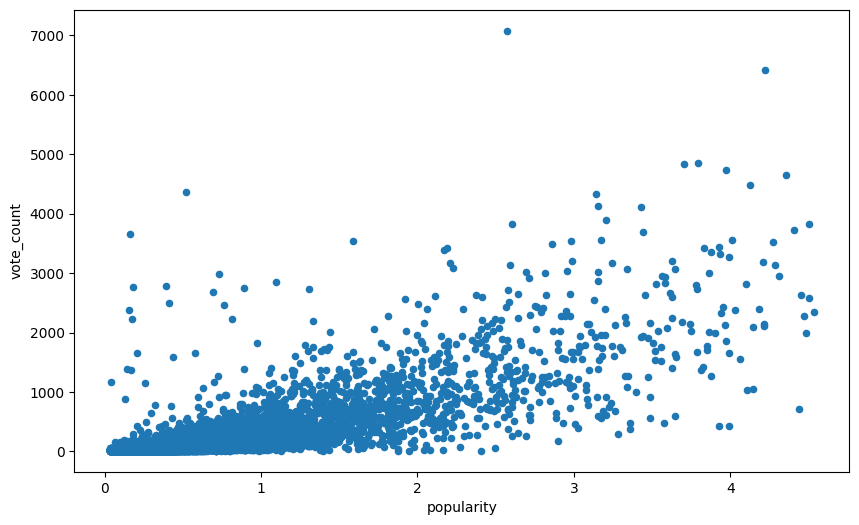

In [291]:
df.plot.scatter(x='popularity', y='vote_count', figsize=(10, 6))

As duas variáveis escolhidas apresentam uma certa covariância, então usaremos elas para fazer o tratamento de outliers bivariado. Inicialmente criaremos uma nova coluna que representa a razão da quantidade de votos pela popularidade. Em seguida será aplicado o método de Z-Score Robusto para a detecção dos outliers.

In [292]:
df['vote_count_by_popularity'] = df['vote_count'] / df['popularity']
df['vote_count_by_popularity'].describe()

<ipython-input-292-fd9a15f83975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_count_by_popularity'] = df['vote_count'] / df['popularity']


count    10274.000000
mean       226.477123
std        527.670568
min          4.154090
25%         75.218340
50%        137.473875
75%        269.082290
max      28733.662930
Name: vote_count_by_popularity, dtype: float64

<Axes: >

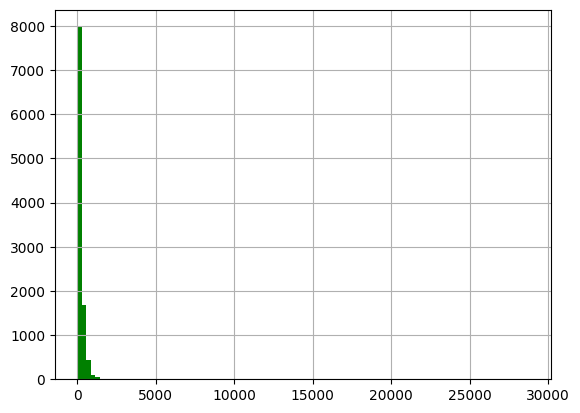

In [293]:
df['vote_count_by_popularity'].hist( color='green', bins=100)

Novamente, o conjunto de dados se apresenta em uma distribuição exponencial, o que podemos resolver aplicando o log10 nesses dados para conseguirmos obter uma distribuição normal.

<ipython-input-294-548996c1d1b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_count_by_popularity'] = np.log10(df['vote_count_by_popularity'])


<Axes: >

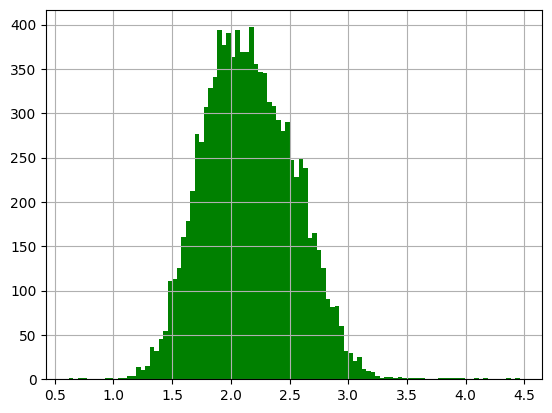

In [294]:
df['vote_count_by_popularity'] = np.log10(df['vote_count_by_popularity'])
df['vote_count_by_popularity'].hist( color='green', bins=100)

Agora com a distribuição simétrica, podemos calcular o MAD (Median Absolute Deviation), que mostra a mediana da distância da diferença de todos os valores da mediana. Com isso poderemos usar o método do Z-Score Robusto para identificar os outliers.

In [295]:
mad = abs(df['vote_count_by_popularity'] - df['vote_count_by_popularity'].median()).median()*(1/0.6745)

<Axes: >

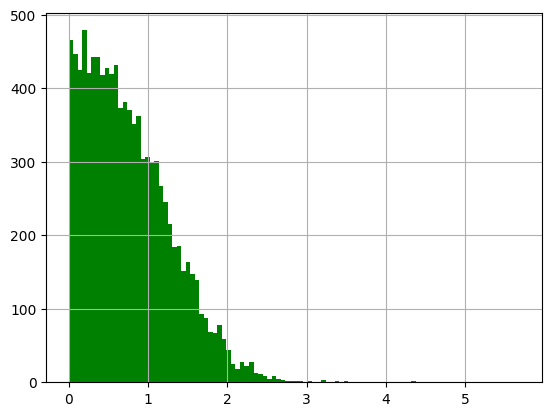

In [296]:
(abs(df['vote_count_by_popularity'] - df['vote_count_by_popularity'].median())/mad).hist( color='green', bins=100)

Observando o plot gerado, definimos o nosso limiar sendo `3.5`, então todos os valores maiores que o limiar serão considerados outliers.

In [297]:
df_without_outliers = df[abs(df['vote_count_by_popularity'] - df['vote_count_by_popularity'].median())/mad <= 3.5]

print(f"Antes da remoção de outliers: {len(df)}")
df = df_without_outliers
print(f"Após a remoção de outliers: {len(df)}")

df.drop(columns=['vote_count_by_popularity'], inplace=True)

Antes da remoção de outliers: 10274
Após a remoção de outliers: 10258


<ipython-input-297-c4a1db619eaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['vote_count_by_popularity'], inplace=True)


#### **Multivariada**

Para realizar o tratamento de outliers multivariado, será usado o método EllipticEnvelope do scikit-learn. Este método é baseado na estimativa de uma elipse que envolve a maior parte dos dados, considerando que os dados fora da elipse são considerados outliers. Como já utilizamos outros métodos de remoção de outliers anteriormente, consideraremos o nivel de contaminação baixo em 0.5%.

In [298]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.005)
detector.fit(df)

EllipticEnvelope(contamination=0.005)

In [299]:
scores = detector.predict(df)

# conta quantos outliers foram detectados
outliers = (scores == -1).sum()
print(outliers, 'outliers detectados')

52 outliers detectados


In [300]:
# adiciona a coluna de outliers ao dataframe
df['outlier'] = scores
df.head()

<ipython-input-300-6cba3b347e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'] = scores


,popularity,vote_count,vote_average,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,release_year_6,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,outlier
27,4.503789,3833,7.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
28,4.062293,1559,7.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
29,3.968891,1849,6.4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
30,3.927333,425,6.4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31,3.899557,1990,6.6,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [301]:
# Remove os outliers detectados
df = df[df['outlier'] != -1]
df.drop(columns=['outlier'], inplace=True)
len(df)

<ipython-input-301-1163601d6d83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['outlier'], inplace=True)


10206

### Discretização e normalização dos dados

In [302]:
df.dtypes

popularity            float64
vote_count              int64
vote_average          float64
release_year_0          int64
release_year_1          int64
release_year_2          int64
release_year_3          int64
release_year_4          int64
release_year_5          int64
release_year_6          int64
release_year_7          int64
release_year_8          int64
release_year_9          int64
release_year_10         int64
release_year_11         int64
release_year_12         int64
release_year_13         int64
Amazon Prime Video      int64
Disney Plus             int64
Hulu                    int64
Max                     int64
Netflix                 int64
Action                  int64
Adventure               int64
Animation               int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Family                  int64
Fantasy                 int64
Foreign                 int64
History                 int64
Horror    

Decidimos discretizar a variável "vote_average" para converter seu intervalo de 0-10 para 1-5. Para isso, criaremos uma nova variável chamada "5_star_score", que será discretizada para se ajustar ao padrão de classificação de 1 a 5 estrelas. Por fim, normalizaremos todas as variáveis.

**Definindo a variável de votação e discretizando-a**

In [303]:
df[['vote_average']].describe()

,vote_average
count,10206.000000
mean,5.993935
std,0.850781
min,3.700000
25%,5.400000
50%,6.000000
75%,6.600000
max,8.300000


<Axes: >

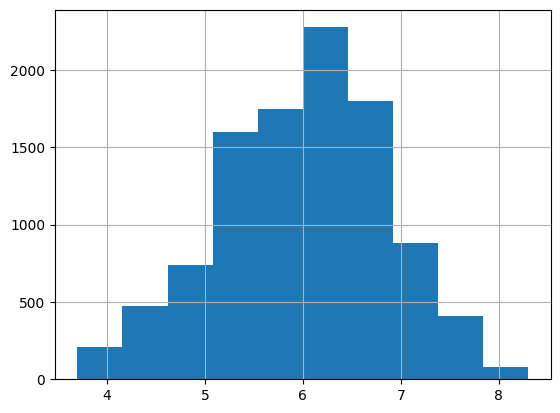

In [304]:
df['vote_average'].hist()

In [305]:
# Define os limites dos intervalos para cada categoria
bin_edges = [0, 2, 4, 6, 8, 10]

# Define os rótulos para cada categoria
bin_labels = [1, 2, 3, 4, 5]

# Discretiza a coluna 'score' com base nos limites dos intervalos e rótulos
df['5_star_score'] = pd.cut(df['vote_average'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)

df[['vote_average', '5_star_score']].head()

<ipython-input-305-b3ba108291b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['5_star_score'] = pd.cut(df['vote_average'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)


,vote_average,5_star_score
28,7.8,4
29,6.4,4
30,6.4,4
31,6.6,4
32,6.8,4


<Axes: >

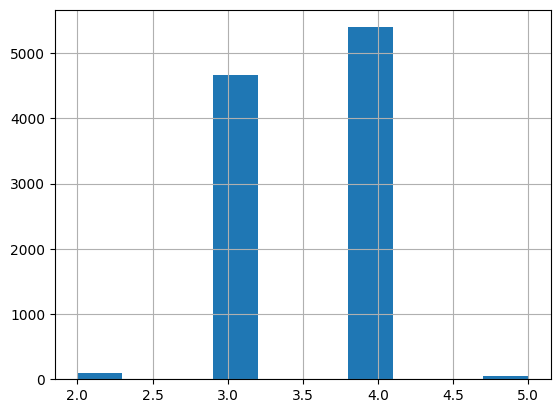

In [306]:
df['5_star_score'].hist()

**Normalização das variáveis numéricas**

In [307]:
df.dtypes

popularity             float64
vote_count               int64
vote_average           float64
release_year_0           int64
release_year_1           int64
release_year_2           int64
release_year_3           int64
release_year_4           int64
release_year_5           int64
release_year_6           int64
release_year_7           int64
release_year_8           int64
release_year_9           int64
release_year_10          int64
release_year_11          int64
release_year_12          int64
release_year_13          int64
Amazon Prime Video       int64
Disney Plus              int64
Hulu                     int64
Max                      int64
Netflix                  int64
Action                   int64
Adventure                int64
Animation                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Family                   int64
Fantasy                  int64
Foreign                  int64
History 

Vamos delimitar as variáveis originalmente numéricas manualmente porque após todas as etapas anteriores todas as variáveis estão definidas por um tipo numérico.

In [308]:
numerical_features = ['popularity', 'vote_average', 'vote_count']

In [309]:
#Instanciando o normalizador
scaler = MinMaxScaler()

#Aplicando a normalzação usando o MinMaxScaler
df_norm = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features, index=df.index)

df_norm

,popularity,vote_average,vote_count
28,0.894890,0.891304,0.517368
29,0.874147,0.586957,0.614228
30,0.864918,0.586957,0.138611
31,0.858750,0.630435,0.661323
32,0.853910,0.673913,0.418838
...,...,...,...
10848,0.045136,0.543478,0.000668
10850,0.001424,0.478261,0.000668
10852,0.053580,0.652174,0.001336
10853,0.001195,0.369565,0.002004


In [310]:
df[numerical_features] = df_norm

<ipython-input-310-73e84e65912b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = df_norm


## Análise Descritiva

### Separando as variáveis em numéricas e categóricas

Como a análise descritiva de variáveis numéricas e categóricas será realizada por meio de métodos diferentes, iremos separá-las. Dessa forma, poderemos agrupar as colunas geradas durante o one-hot encoding de cada variável categórica.

In [311]:
df.columns

Index(['popularity', 'vote_count', 'vote_average', 'release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13', 'Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       '5_star_score'],
      dtype='object')

In [312]:
print(f'Colunas de dados numéricos: {numerical_features}')
print("Dados categóricos: 'release_year', 'streaming_services', 'genres', '5_star_score'")

Colunas de dados numéricos: ['popularity', 'vote_average', 'vote_count']
Dados categóricos: 'release_year', 'streaming_services', 'genres', '5_star_score'


In [313]:
release_year_columns = ['release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13']
streaming_services_columns = ['Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix']
genres_columns = ['Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

### Estatísticas univariadas

####**Variáveis numéricas**

In [314]:
df[numerical_features].describe()

,popularity,vote_average,vote_count
count,10206.000000,10206.000000,10206.000000
mean,0.123122,0.498682,0.053143
std,0.132544,0.184952,0.113881
min,0.000000,0.000000,0.000000
25%,0.041396,0.369565,0.002338
50%,0.079916,0.500000,0.010020
75%,0.150895,0.630435,0.044756
max,1.000000,1.000000,1.000000


In [315]:
# Calcula a moda das features numéricas
df[numerical_features].mode().iloc[0]

popularity      0.00272
vote_average    0.50000
vote_count      0.00000
Name: 0, dtype: float64

Ao analisar as informações estatísticas sobre as variáveis numéricas, podemos observar um padrão interessante. Com exceção da variável "vote average", a diferença entre a média e a mediana é significativa, o que pode indicar a presença de valores extremos na distribuição dos dados. Uma análise mais detalhada revela que os dados de "popularity" e, principalmente, de "vote count" estão concentrados em valores mais baixos. Isso sugere que a distribuição dessas variáveis é assimétrica à direita (right skewed).

Essa assimetria é confirmada ao examinarmos os valores mínimo e máximo, e os quartis. Observa-se que a diferença entre os valores mínimos e os quartis é pequena, enquanto a diferença entre o terceiro quartil e o valor máximo é significativa. Esse padrão reforça a ideia de que "popularity" e "vote count" apresentam distribuições concentradas em valores mais baixos, com alguns valores extremos puxando a média para cima.

Por outro lado, a variável "vote average" apresenta uma distribuição próxima à simétrica. Os dados estão concentrados em torno dos valores medianos entre o mínimo e o máximo, indicando uma distribuição mais equilibrada. A moda dessas variáveis também corrobora essa análise: enquanto "popularity" e "vote count" têm um maior número de dados repetidos em valores baixos, a moda de "vote average" é a mediana. Essa observação reforça a simetria na distribuição de "vote average", contrastando com a assimetria observada nas outras variáveis.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >]], dtype=object)

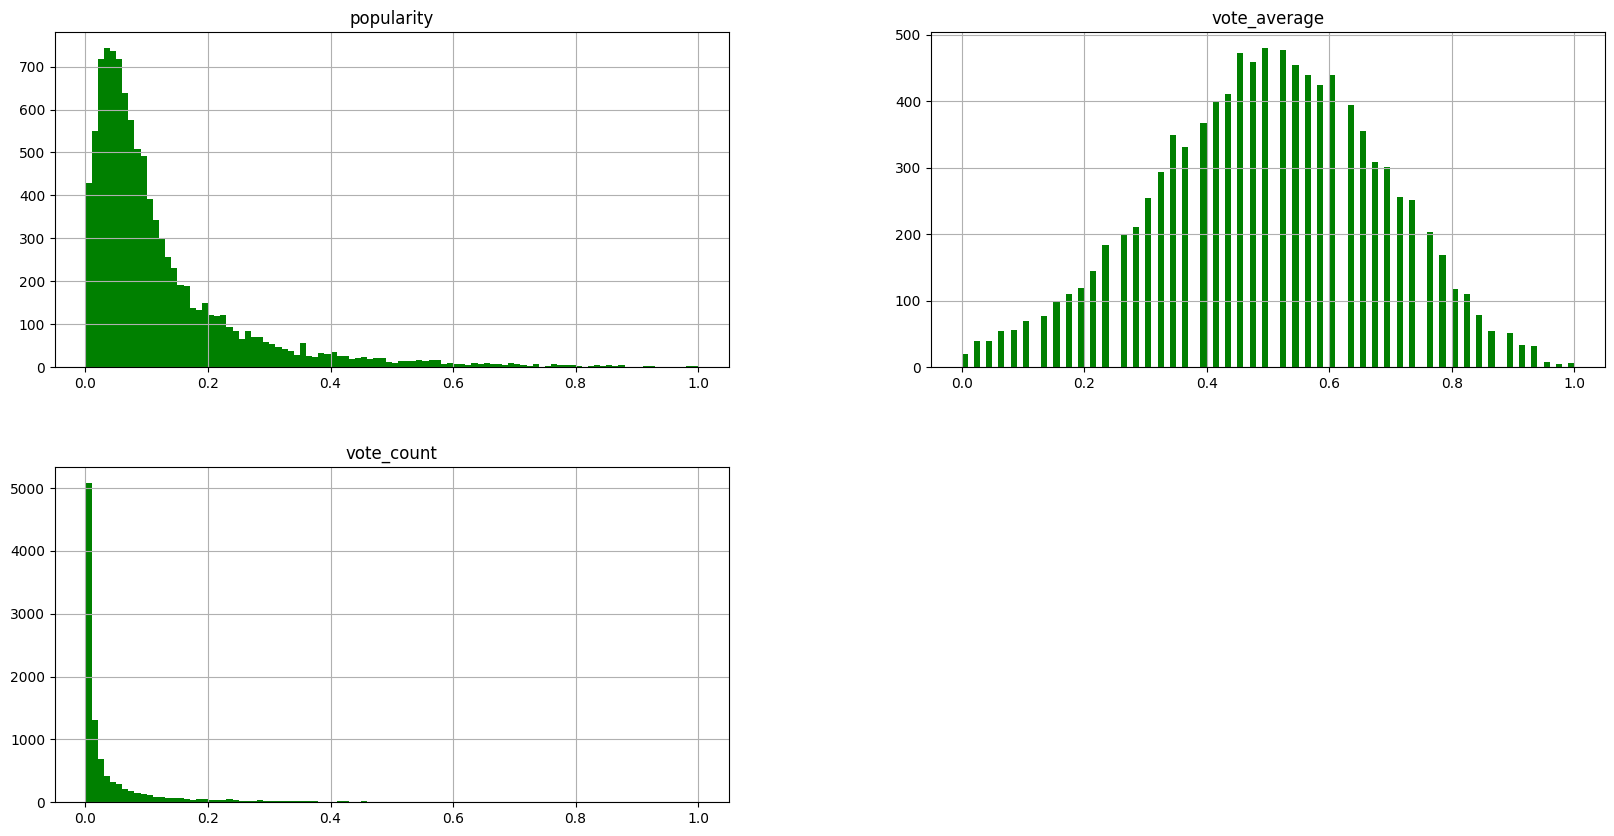

In [316]:
df[numerical_features].hist(figsize=(20, 10), color='green', bins=100)

Ao analisar esses histogramas, podemos confirmar as hipóteses anteriormente formuladas sobre as distribuições dos dados numéricos.

In [317]:
# Intervalos interquartis para as features numéricas
df[numerical_features].quantile(0.75) - df[numerical_features].quantile(0.25)

popularity      0.109499
vote_average    0.260870
vote_count      0.042418
dtype: float64

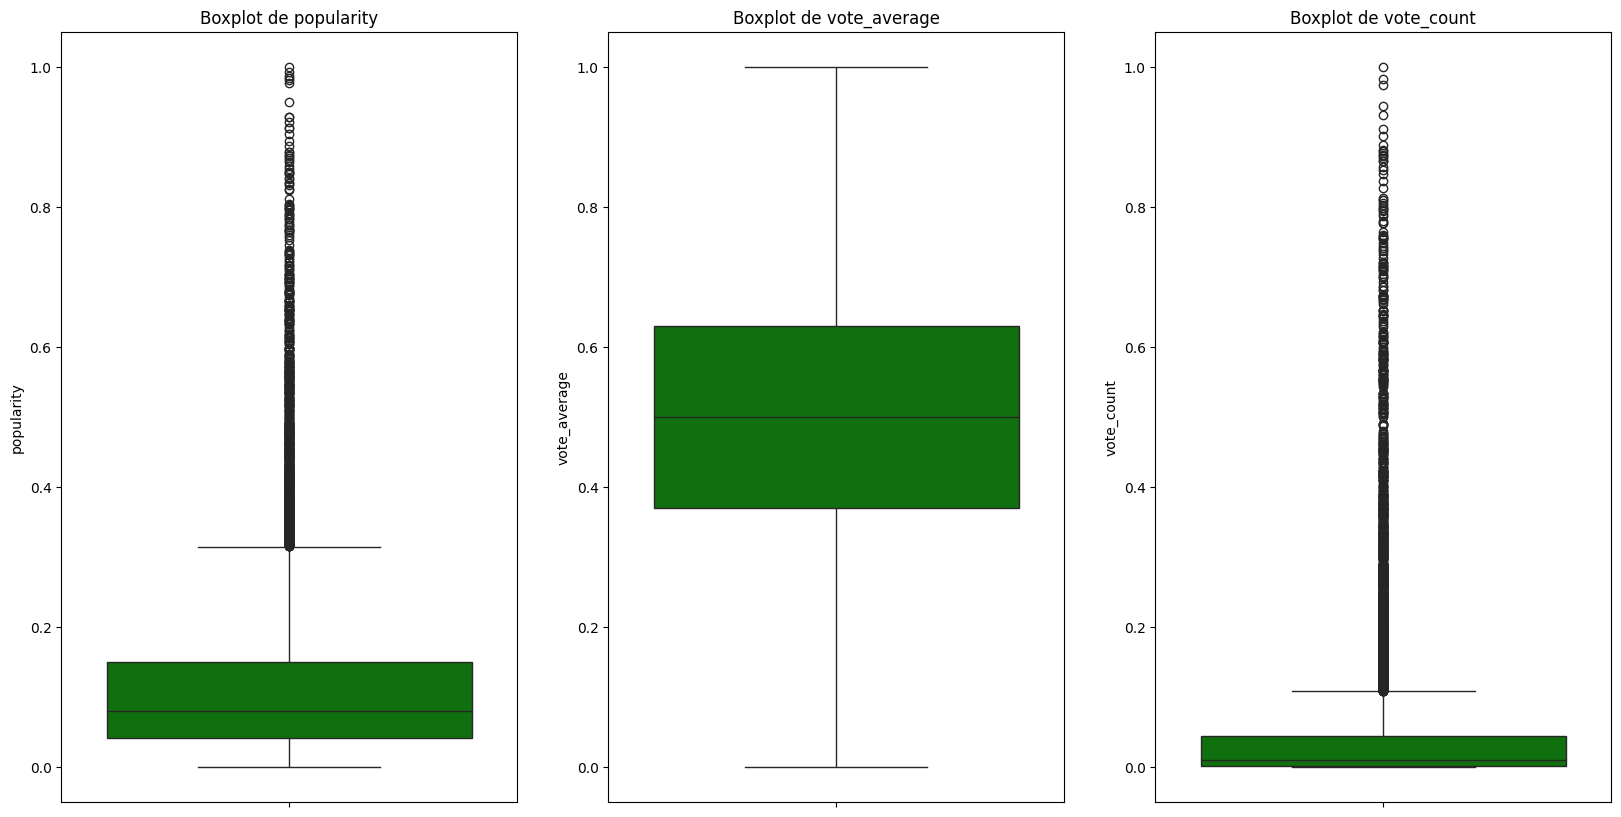

In [318]:
# box plots para cada coluna numérica
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot de {col}')


Os boxplots confirmam o mesmo comportamento observado nas análises estatísticas e nos histogramas. No entanto, eles também revelam que, mesmo após o tratamento de outliers, ainda existem dados que ultrapassam os limites do whisker superior. Isso pode ser explicado pelo uso de diversos métodos diferentes para a remoção de outliers, além da criação de colunas auxiliares que foram posteriormente descartadas.

####**Variáveis categóricas**

In [325]:
def plot_bar_chart(column_list, title):
    # Soma dos valores para cada coluna categórica
    df_temp = df[column_list].sum().reset_index()
    df_temp.columns = ['Category', 'Count']

    # Ordena por contagem
    df_temp = df_temp.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='Count', y='Category', data=df_temp, palette='viridis')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Category')

    # Adiciona rótulos nas barras
    for index, value in enumerate(df_temp['Count']):
        barplot.text(value, index, str(value), color='black', ha="left")

    plt.show()

<ipython-input-325-67c6d086194d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Category', data=df_temp, palette='viridis')


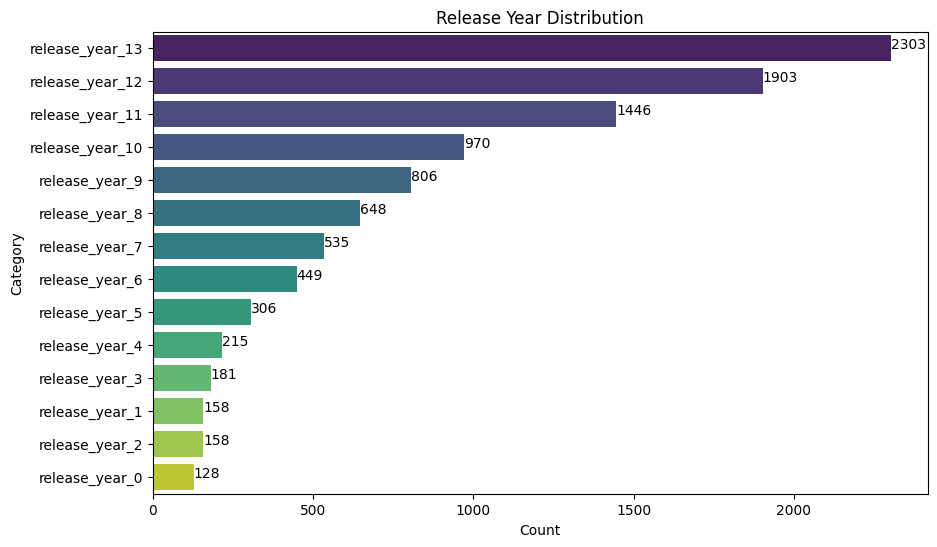

<ipython-input-325-67c6d086194d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Category', data=df_temp, palette='viridis')


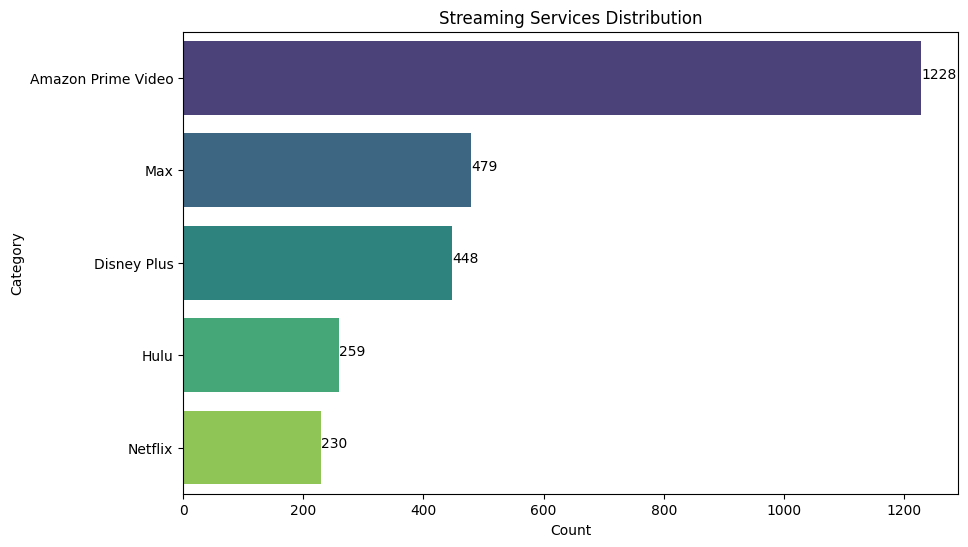

<ipython-input-325-67c6d086194d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Category', data=df_temp, palette='viridis')


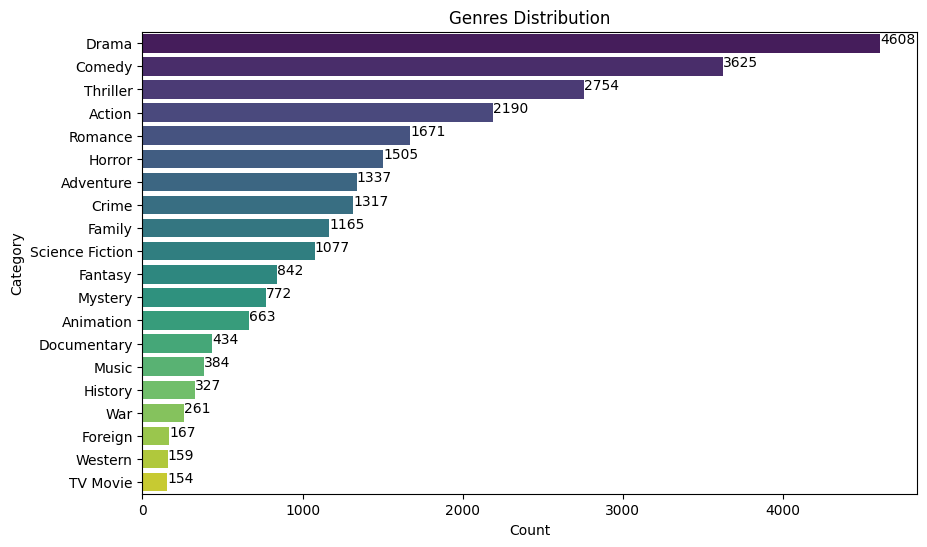

In [326]:
# Plotando gráficos de barras para cada grupo de colunas categóricas
plot_bar_chart(release_year_columns, 'Release Year Distribution')
plot_bar_chart(streaming_services_columns, 'Streaming Services Distribution')
plot_bar_chart(genres_columns, 'Genres Distribution')

<ipython-input-327-e9e72c5fda5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(x='5_star_score', data=df, palette='viridis')


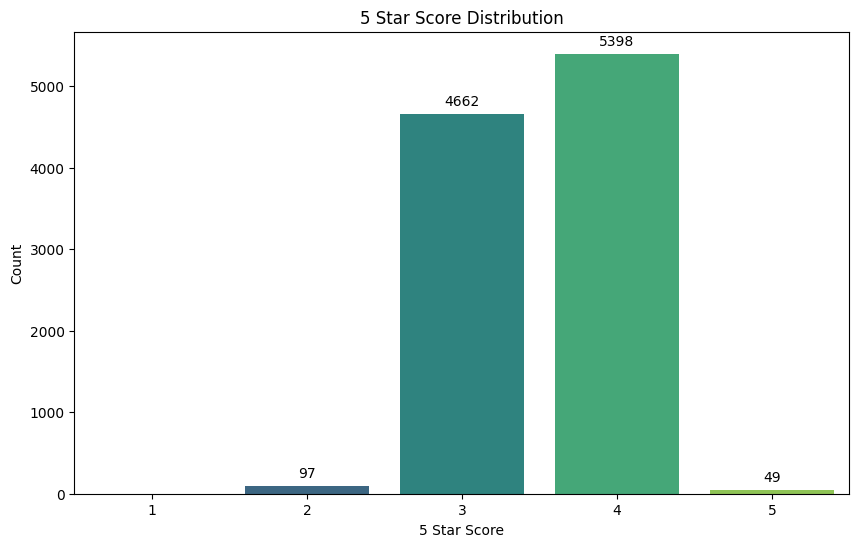

In [327]:
# Para a variável 5_star_score que não passou por one hot encoding
plt.figure(figsize=(10, 6))
barplot = sns.countplot(x='5_star_score', data=df, palette='viridis')
plt.title('5 Star Score Distribution')
plt.xlabel('5 Star Score')
plt.ylabel('Count')

# Adicionar rótulos nas barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()

A análise dos gráficos de frequência dos filmes no dataset revela algumas tendências interessantes. Primeiramente, observamos que a maioria dos filmes foi lançada entre 2011 e 2015 (release_year_13). Além disso, é notável que a maioria desses filmes está disponível na plataforma de streaming "Amazon Prime", enquanto a presença na Netflix é menor. Uma hipótese para essa disparidade é que a Netflix pode estar priorizando um catálogo mais robusto de filmes originais e produções em alta demanda.

Também vale destacar que os gêneros mais comuns entre os filmes do dataset são drama, comédia, thriller e ação, que são, de fato, gêneros populares na cultura cinematográfica.

Outro ponto interessante é a distribuição das avaliações dos filmes. A maioria recebeu pontuações consideradas boas (5 star score = 4) ou medianas (5 star score = 3). Curiosamente, não há registros de filmes com avaliações extremamente baixas (1) e apenas alguns com classificações ruins (2) ou excelentes (5).

### Estatísticas bivariadas

**Variáveis numéricas x Variáveis numéricas**

Agora vamos analisar as correlações entre as variáveis numéricas

In [344]:
correlation_matrix = df[numerical_features].corr(method='pearson')
correlation_matrix

,popularity,vote_average,vote_count
popularity,1.000000,0.199336,0.823536
vote_average,0.199336,1.000000,0.244666
vote_count,0.823536,0.244666,1.000000


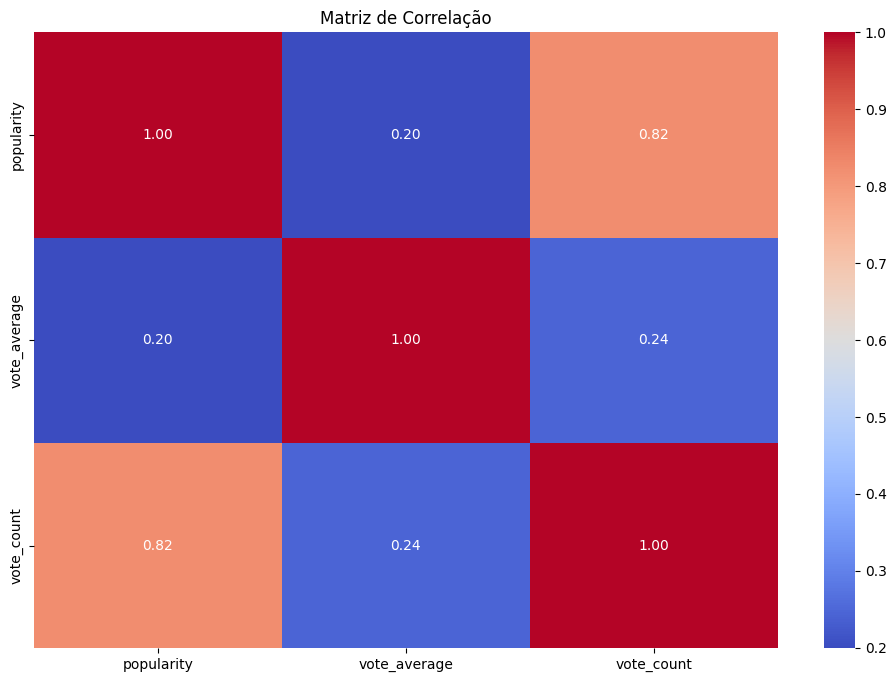

In [345]:
# Plotar heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Como já visto anteriormente, as features **vote_count** e **popularity** tem uma forte correlação. Agora faremos novamente um gráfico de dispersão para visualizar essa correlação entre essas variáveis, e comparar com a correlação entre **popularity** e **vote_average** que é baixa.

Text(0.5, 1.0, 'Scatter Plot entre Quantidade de votos e Popularidade')

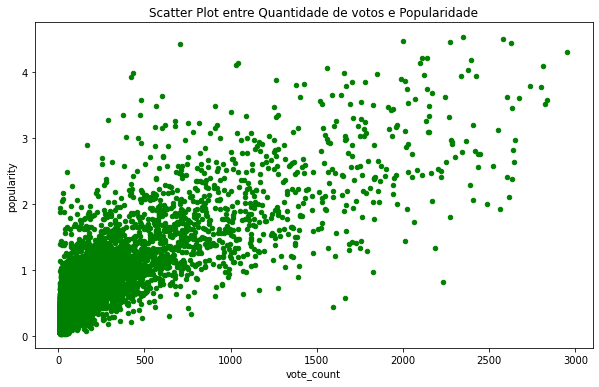

In [ ]:
# scatter plot entre vote_count e popularity
df.plot.scatter(x='vote_count', y='popularity', color='green', figsize=(10, 6))
plt.title('Scatter Plot entre Quantidade de votos e Popularidade')

Text(0.5, 1.0, 'Scatter Plot entre Média de votos e Popularidade')

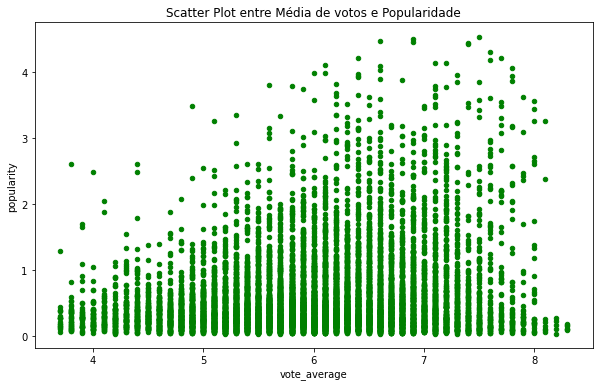

In [ ]:
# scatter plot entre vote_average e popularity
df.plot.scatter(x='vote_average', y='popularity', color='green', figsize=(10, 6))
plt.title('Scatter Plot entre Média de votos e Popularidade')

## Teste de Hipóteses

Para o nosso teste de hipótese, vamos verificar se a popularidade dos filmes é influenciada pelo fato de estar disponível na Amazon Prime Video ou não. Para isso, vamos realizar um teste de hipótese de duas amostras independentes, onde a hipótese nula é que a popularidade dos filmes disponíveis na Amazon Prime Video é igual à popularidade dos filmes que não estão disponíveis na Amazon Prime Video.

In [ ]:
# vamos comparar a popularidade entre os filmes que estão na Amazon Prime Video e os filmes que não estão
print('Estatísticas de Popularidade para filmes que não estão na Amazon Prime Video:')
print(df[df['Amazon Prime Video'] == 0]['popularity'].describe())

print('\nEstatísticas de Popularidade para filmes que estão na Amazon Prime Video:')
print(df[df['Amazon Prime Video'] == 1]['popularity'].describe())



Estatísticas de Popularidade para filmes que não estão na Amazon Prime Video:
count    8978.000000
mean        0.600028
std         0.610303
min         0.032666
25%         0.220946
50%         0.399444
75%         0.737258
max         4.535598
Name: popularity, dtype: float64

Estatísticas de Popularidade para filmes que estão na Amazon Prime Video:
count    1228.000000
mean        0.492349
std         0.477291
min         0.034312
25%         0.208358
50%         0.351823
75%         0.581335
max         3.927333
Name: popularity, dtype: float64


([<matplotlib.axis.XTick at 0x20c11cdb850>,
 [Text(0, 0, 'Não'), Text(1, 0, 'Sim')])

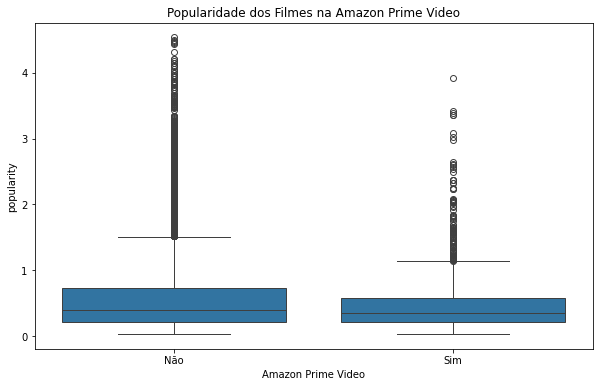

In [ ]:
# box plot para a popularidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amazon Prime Video', y='popularity', data=df)
plt.title('Popularidade dos Filmes na Amazon Prime Video')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])

Precisamos agora saber se os dados seguem uma distribuiçao normal ou não para saber qual método usar para testar a hipótese.

<Axes: >

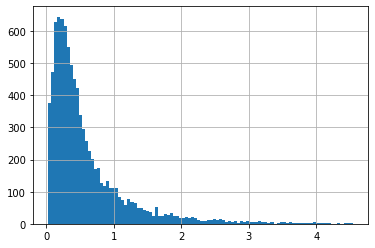

In [ ]:
df[df['Amazon Prime Video'] == 0]['popularity'].hist(bins=100)

Como os dados não estão seguindo uma distribuição normal, e estamos comparando 2 grupos não pareados, iremos usar o método Mann-Whitney para realizar o nosso teste de hipótese.
- _Hipótese nula_: as distribuições de popularidade são iguais para os filmes que estão na Amazon Prime Video.
- Consideraremos o nível de confiança em 5%

In [ ]:
# teste de hipótese com Mann-Whitney
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df[df['Amazon Prime Video'] == 0]['popularity'], df[df['Amazon Prime Video'] == 1]['popularity'])
print('Estatística de teste:', stat)
print('p-valor:', p)

if (p < 0.05):
    print('Rejeitamos a hipótese nula')


Estatística de teste: 5990049.5
p-valor: 8.160645304779653e-07
Rejeitamos a hipótese nula


Como o p-value foi `8.160645304779653e-07`, menor que `0.05`, rejeitamos a hipótese nula de que as distribuições são iguais. Ou seja, os filmes que estão na Amazon Prime Video, tem uma popularidade inferior ao filmes que não estão nessa plataforma.